In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, MaxPooling2D, Conv2D, BatchNormalization, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ReduceLROnPlateau
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')

In [2]:
train_path = '/home/s4lm_xi/AI/DL/02-CNN/Datasets/Dog-Cat/dataset/training_set'
test_path = '/home/s4lm_xi/AI/DL/02-CNN/Datasets/Dog-Cat/dataset/test_set'

train_data_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True, shear_range=0.25,
                                    zoom_range=0.25, width_shift_range=0.2, height_shift_range=0.2)
training_set = train_data_gen.flow_from_directory(train_path, target_size=(64,64), class_mode ='binary', batch_size=64)


Found 8000 images belonging to 2 classes.


In [3]:
test_data_gen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
testing_set = test_data_gen.flow_from_directory(test_path, target_size=(64,64), class_mode='binary', batch_size=64)


Found 2000 images belonging to 2 classes.


In [4]:
model = Sequential()

#convolutional layer
model.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(64, activation='relu', kernel_size=3))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.5))

#Flattening 
model.add(tf.keras.layers.Flatten())

#Full connection with neurons
model.add(tf.keras.layers.Dense(128, activation='relu'))

#Output layer
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [9]:
callback = ReduceLROnPlateau(monitor='val_loss', verbose=1, min_lr = 0.0000001, patience=5, cooldown=3)

history = model.fit(x=training_set, validation_data= testing_set, epochs=50, 
                    callbacks=[callback])
model.save_weights('weights.h5')

Epoch 1/50
125/125 [==============================] - 69s 555ms/step - loss: 0.5817 - accuracy: 0.6906 - val_loss: 0.9572 - val_accuracy: 0.5345
Epoch 2/50
125/125 [==============================] - 76s 609ms/step - loss: 0.5746 - accuracy: 0.6966 - val_loss: 0.7406 - val_accuracy: 0.6905
Epoch 3/50
125/125 [==============================] - 72s 573ms/step - loss: 0.5680 - accuracy: 0.7032 - val_loss: 0.7341 - val_accuracy: 0.6415
Epoch 4/50
125/125 [==============================] - 62s 494ms/step - loss: 0.5567 - accuracy: 0.7096 - val_loss: 0.5576 - val_accuracy: 0.7270
Epoch 5/50
125/125 [==============================] - 63s 500ms/step - loss: 0.5499 - accuracy: 0.7176 - val_loss: 0.6238 - val_accuracy: 0.6640
Epoch 6/50
125/125 [==============================] - 63s 505ms/step - loss: 0.5460 - accuracy: 0.7144 - val_loss: 0.5148 - val_accuracy: 0.7425
Epoch 7/50
125/125 [==============================] - 63s 503ms/step - loss: 0.5390 - accuracy: 0.7221 - val_loss: 0.5464 - val_ac

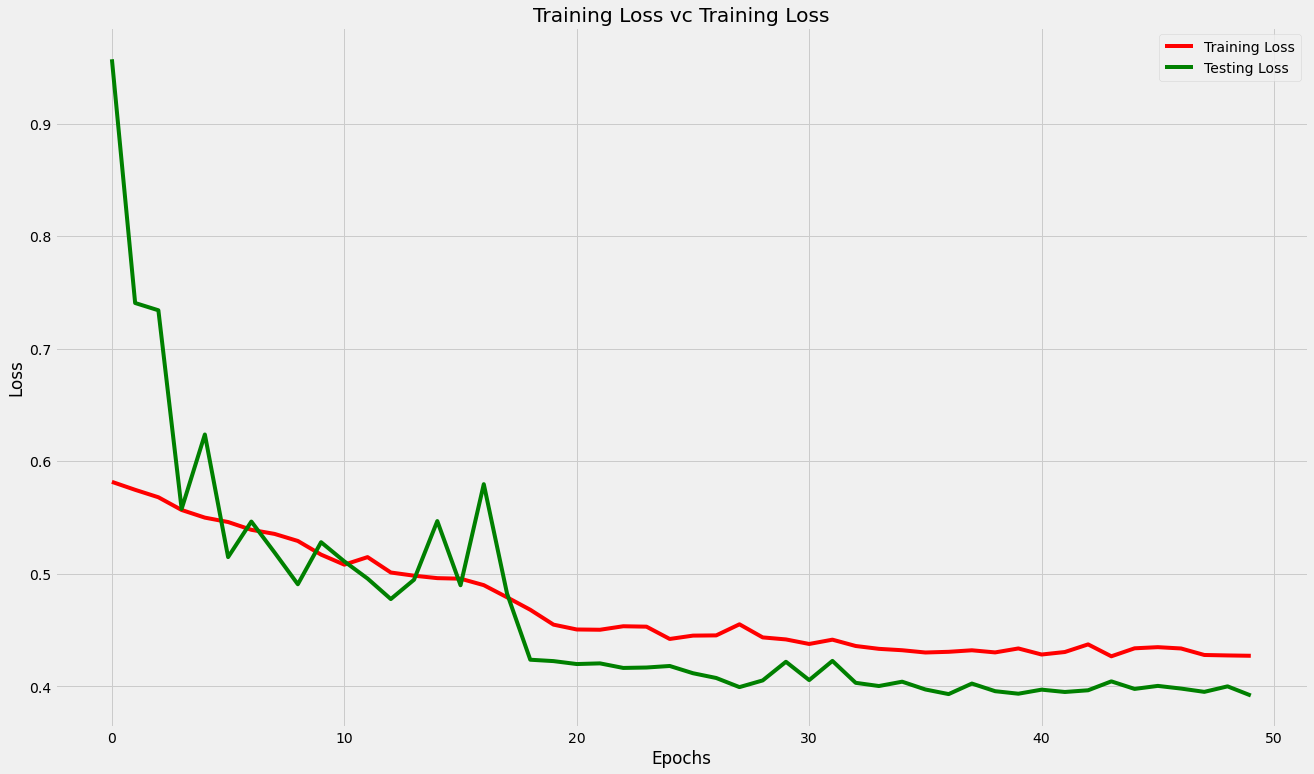

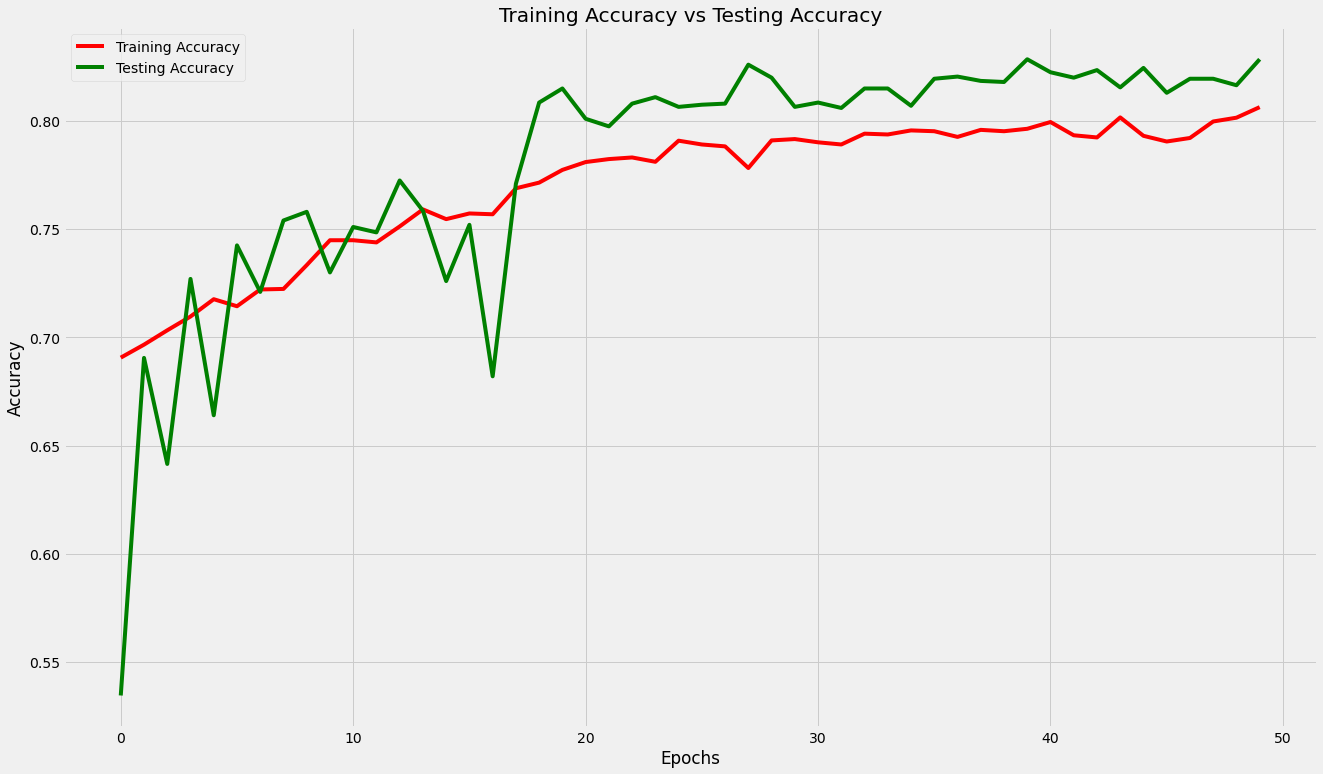

In [20]:
plt.figure(figsize=(20,12))
plt.plot(history.history['loss'], color='red', label='Training Loss')
plt.plot(history.history['val_loss'], color='green', label='Testing Loss')
plt.title('Training Loss vc Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.figure(figsize=(20,12))
plt.plot(history.history['accuracy'], color='red', label='Training Accuracy')
plt.plot(history.history['val_accuracy'], color='green', label='Testing Accuracy')
plt.title('Training Accuracy vs Testing Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()